<a href="https://colab.research.google.com/gist/gretahartm/c6730f648b514c1c1c6d153738bb07f5/3notebooksb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook 03

##Data normalization

Data normalization means that we want to set the mean and std of each image channel to a set value. Usually, the mean is set to 0 and standard deviation to



*  Performed data normalization for the dataset
*  Set the mean to 0 and standard deviation to 1 for each image channel
*  Ensured data remains within the range suitable for the activation function
*  Equalized distribution across the 3 image channels for an appropriate learning rate
*   Calculated the mean and standard deviation for each channel in the dataset
*   Applied normalization to the transform pipeline for dataset images
*   Used the same normalization for new images from the same distribution
*   Saved the calculated mean and standard deviation in the project configuration file


In [ ]:
!pip install albumentations==1.3.0
!git clone https://github.com/kevin-allen/unetTracker
!pip install -r unetTracker/requirements.txt
!pip install -e unetTracker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20
Cloning into 'unetTracker'...
remote: Enumerating objects: 1022, done.
remote: Counting objects: 100% (401/401), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 1022 (delta 233), reused 353 (delta 204), pack-reused 621 (from 1)
Receiving objects: 100% (1022/1022), 127.56 MiB | 25.66 MiB/s, done.
Resolving deltas: 100% (623/623), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

fn = "/content/drive/My Drive/ssfolder"
if os.path.exists(fn):
  print("We can access the ssfolder directory.")
else:
  raise IOError("Problem accessing the ssfolder directory.")

Mounted at /content/drive
We can access the ssfolder directory.


In [ ]:
# this will run the code in the setup_project.py and create a variable called `project`
fn = "/content/drive/My Drive/ssfolder/setup_project.py"
if os.path.exists(fn):
  print("We can access the file.")
else:
  raise IOError("Problem accessing the file.")

%run "/content/drive/My Drive/ssfolder/setup_project.py"

We can access the file.
Project directory: /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker
Getting configuration from config file. Values from config file will be used.
Loading /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/config.yalm
{'augmentation_HorizontalFlipProb': 0.5, 'augmentation_RandomBrightnessContrastProb': 0.2, 'augmentation_RandomSizedCropProb': 1.0, 'augmentation_RotateProb': 0.3, 'image_extension': '.png', 'image_size': [270, 480], 'labeling_ImageEnlargeFactor': 2.0, 'name': 'simonebiles_tracker', 'normalization_values': None, 'object_colors': [(240.0, 248.0, 255.0), (250.0, 235.0, 215.0), (0.0, 255.0, 255.0), (127.0, 255.0, 212.0), (240.0, 255.0, 255.0), (245.0, 245.0, 220.0), (255.0, 228.0, 196.0), (0.0, 0.0, 0.0), (255.0, 235.0, 205.0), (0.0, 0.0, 255.0)], 'objects': ['head', 'right knee', 'left knee', 'right foot', 'left foot', 'right hand', 'left hand', 'right shoulder', 'left shoulder', 'behind'], 'target_radius': 4, '

In [ ]:
from torch import optim
import torch
import torch.nn as nn
import albumentations as A

from unetTracker.dataset import UNetDataset
from unetTracker.unet import Unet

In [ ]:
dataset = UNetDataset(image_dir=project.image_dir, mask_dir=project.mask_dir, coordinate_dir=project.coordinate_dir,
                      image_extension=project.image_extension)

In [ ]:
len(dataset)


159

#Calculate means and standard deviation of each color channel

In [ ]:
means,stds = dataset.get_normalization_values()

In [ ]:
print("means:",means)
print("stds:", stds)

means: [49.795357 40.543613 35.576973]
stds: [41.789257 41.576275 42.671658]


#Saving normalization values in the project configuration

The formula for normalization in the Albumentations normalization function is :

*img = (img - mean * max_pixel_value) / (std * max_pixel_value)*

In [ ]:
project.set_normalization_values(means/255.0,stds/255.0)
project.normalization_values

{'means': [0.1952759027481079, 0.15899455547332764, 0.13951754570007324],
 'stds': [0.16387943923473358, 0.16304421424865723, 0.16733983159065247]}

In [ ]:
project.save_configuration()

Saving /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/config.yalm


In [ ]:
project.load_configuration()

Loading /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/config.yalm
{'augmentation_HorizontalFlipProb': 0.5, 'augmentation_RandomBrightnessContrastProb': 0.2, 'augmentation_RandomSizedCropProb': 1.0, 'augmentation_RotateProb': 0.3, 'image_extension': '.png', 'image_size': [270, 480], 'labeling_ImageEnlargeFactor': 2.0, 'name': 'simonebiles_tracker', 'normalization_values': {'means': [0.1952759027481079, 0.15899455547332764, 0.13951754570007324], 'stds': [0.16387943923473358, 0.16304421424865723, 0.16733983159065247]}, 'object_colors': [(240.0, 248.0, 255.0), (250.0, 235.0, 215.0), (0.0, 255.0, 255.0), (127.0, 255.0, 212.0), (240.0, 255.0, 255.0), (245.0, 245.0, 220.0), (255.0, 228.0, 196.0), (0.0, 0.0, 0.0), (255.0, 235.0, 205.0), (0.0, 0.0, 255.0)], 'objects': ['head', 'right knee', 'left knee', 'right foot', 'left foot', 'right hand', 'left hand', 'right shoulder', 'left shoulder', 'behind'], 'target_radius': 4, 'unet_features': [64, 128, 256, 512]}


#Apply normalization when training the network
apply normalization by setting the transform argument of the dataset

In [ ]:
means = project.normalization_values["means"]
stds = project.normalization_values["stds"]

transform = A.Compose([A.Normalize(mean=means, std=stds)])
transform

Compose([
  Normalize(always_apply=False, p=1.0, mean=[0.1952759027481079, 0.15899455547332764, 0.13951754570007324], std=[0.16387943923473358, 0.16304421424865723, 0.16733983159065247], max_pixel_value=255.0),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

In [ ]:
datasetNoNorm = UNetDataset(image_dir=project.image_dir,
                            mask_dir=project.mask_dir,
                            coordinate_dir=project.coordinate_dir,
                            image_extension=project.image_extension)
datasetWithNorm = UNetDataset(image_dir=project.image_dir,
                              mask_dir=project.mask_dir,
                              coordinate_dir=project.coordinate_dir,
                              transform=transform, # we pass our transform function to the UNetDataset object
                              image_extension=project.image_extension)

In [ ]:
imgNoNorm,_,_ = datasetNoNorm[0]
imgWithNorm,_,_ = datasetWithNorm[0]

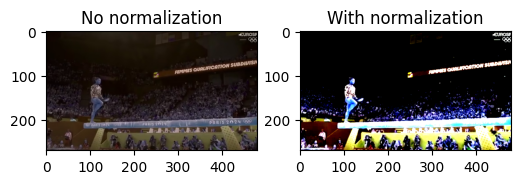

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(6,3))
ax[0].imshow(imgNoNorm.permute(1,2,0)/255)
ax[0].set_title("No normalization")
ax[1].imshow(imgWithNorm.permute(1,2,0))
ax[1].set_title("With normalization")
plt.show()

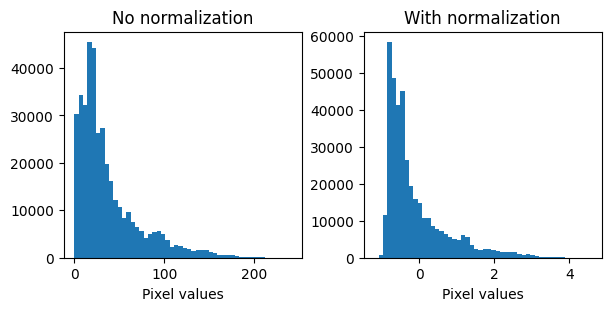

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(6,3),layout="constrained")
ax[0].hist(imgNoNorm.flatten(),bins=50)
ax[0].set_xlabel("Pixel values")
ax[0].set_title("No normalization")
ax[1].hist(imgWithNorm.flatten(),bins=50)
ax[1].set_xlabel("Pixel values")
ax[1].set_title("With normalization")
plt.show()